# Requiared Library

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# Algorithm Flow
1. Convert Image To black and white image
2. Detect a Group of White pixels
3. Crop the image based on Region Of Interest that created from step 2
4. Template Matching image to group the image based on numbers and words
5. Train and create CNN model using the dataset from step 4
6. Use the CNN model to read words and number on the plate

# Pre-Processing Image (Experiment)

(500, 1000, 3)
421 130


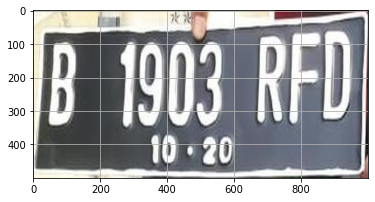

In [3]:
img = cv2.imread("assets/DataTrain/DataTrain19.png")
 
# * Resizing The Image to 600x600 pixel
resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
print(resize.shape)

print(len(img[0]), len(img),)
# * Converting color channel order from Blue Green Red to Red Green Blue 
im_rgb = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.grid(True)

# ? enable this code to remove plot ticks
#plt.xticks([]), plt.yticks([])

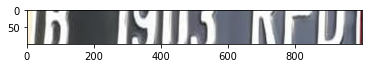

In [4]:
x1, y1 = 100, 100  # top-left coordinate
x2, y2 = 300, 300 
plt.imshow(im_rgb[y1:y2][x1:x2])

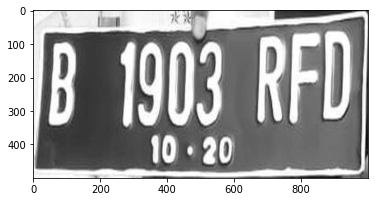

In [5]:

"""
 * Converting 3 Color Channel to 1 Channel of Grayscale
"""
gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

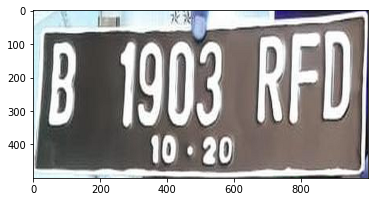

In [6]:
kernel = np.array([
    [0, -1, 0], 
    [-1, 5, -1], 
    [0, -1, 0]])  # Kernel sharpening
sharpened_image = cv2.filter2D(resize, -1, kernel)

plt.imshow(sharpened_image, cmap="gray")

(<matplotlib.image.AxesImage at 0x24943aad790>, None)

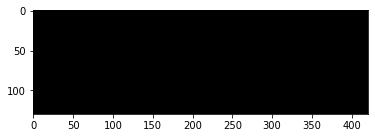

In [7]:
lower_yellow = np.array([0, 100, 100])
upper_yellow = np.array([50, 255, 255])
yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

plt.imshow(yellow_mask, cmap='binary_r'), plt.grid(False)

(<matplotlib.image.AxesImage at 0x24943b14b80>, None)

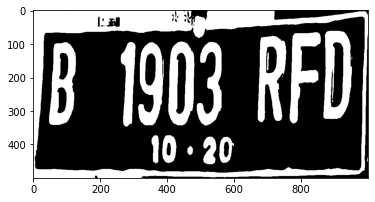

In [8]:


#thresh = ''
if cv2.countNonZero(yellow_mask) > 195:
    """
    * Converting Grayscale image to Black and White image using Thresh otsu technique
    """
    ret, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
else:
    ret, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='binary_r'), plt.grid(False)

(<matplotlib.image.AxesImage at 0x24941837c40>, None)

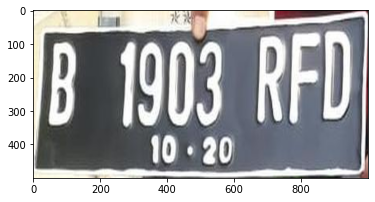

In [9]:

"""
    TODO : Still need more adjustment for detecting white Region

    * finContours() : A method to detect a group of white pixels in thresholded image
    - cv2.RETR_EXTERNAL : To prevent detecting child contours that can create rekursif contours 
    - cv2.CHAIN_APPROX_SIMPLE : one of contours finding technique that use approximation method

    * boundingRect() : A method to get x and y Axis and height and width of the ROI
    * rectangle() : A method to draw the ROI border
"""

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
detected_contours = resize.copy()

for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    if h > w and (h - w) > 20:
        print(f"image {i} = [x : {x}, y : {y}, w : {w}, h : {h}, different of w and h : {h-w}]")
        cv2.rectangle(detected_contours,(x,y),(x+w,y+h),(0,0,255), 2)

im_rgb = cv2.cvtColor(detected_contours, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb), plt.grid(False)

# Main Algorithm

In [10]:

def preprocessing(img):
    # * Resizing The Image to 600x600 pixel
    # resize = cv2.resize(img,[600,600])
    resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    

    lower_yellow = np.array([0, 100, 100])
    upper_yellow = np.array([50, 255, 255])
    yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

    if cv2.countNonZero(yellow_mask) > 195:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    else:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if h > w and (h - w) > 15:
            cv2.rectangle(resize,(x,y),(x+w,y+h),(0,0,255), 2)
    
    return resize

def preprocessing2(img):
    # * Resizing The Image to 600x600 pixel
    # resize = cv2.resize(img,[600,600])
    resize = cv2.resize(img,[1000,500], interpolation=cv2.INTER_LANCZOS4)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    

    lower_yellow = np.array([0, 100, 100])
    upper_yellow = np.array([50, 255, 255])
    yellow_mask = cv2.inRange(img, lower_yellow, upper_yellow)

    if cv2.countNonZero(yellow_mask) > 195:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    else:
        _, thresh = cv2.threshold(gray_img,0,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    cropped = []
    
    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i])
        if h > w and (h - w) > 15:
            cropped.append(resize[y:y+h, x:x+w])
    
    return cropped

In [11]:
directory = "assets/DataTrain/"
listOfImages = os.listdir(directory)
len(listOfImages)

collections = []
for i in range(1,len(listOfImages)):
    img = cv2.imread(f"assets/DataTrain/DataTrain{i}.png")
    collections.append(preprocessing(img))



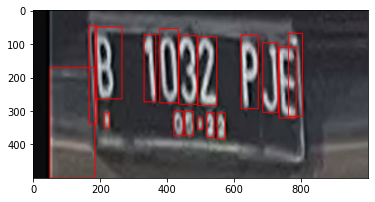

In [12]:
view =  cv2.cvtColor(collections[11], cv2.COLOR_BGR2RGB)
plt.imshow(view)

In [23]:
c_collections = []
for i in range(1,len(listOfImages)):
    img = cv2.imread(f"assets/DataTrain/DataTrain{i}.png")
    numChar = preprocessing2(img)
    # c_collections.append(numChar)
    for j in numChar:
        print(j)
        c_collections.append(j)


[[[36 54 71]
  [37 55 72]
  [37 55 72]
  ...
  [35 53 70]
  [34 52 69]
  [33 51 68]]

 [[37 55 71]
  [37 56 72]
  [38 56 72]
  ...
  [36 54 70]
  [35 53 69]
  [33 52 68]]

 [[37 56 71]
  [38 56 72]
  [38 57 73]
  ...
  [36 55 71]
  [35 54 70]
  [34 52 68]]

 ...

 [[33 52 67]
  [34 53 68]
  [36 55 70]
  ...
  [39 58 73]
  [38 57 72]
  [37 56 71]]

 [[32 51 66]
  [34 53 68]
  [35 54 69]
  ...
  [38 57 72]
  [38 57 72]
  [37 56 71]]

 [[32 51 66]
  [34 53 68]
  [35 54 69]
  ...
  [38 56 72]
  [37 56 71]
  [37 56 71]]]
[[[29 51 69]
  [29 51 69]
  [30 52 70]
  ...
  [33 55 73]
  [33 55 73]
  [32 54 72]]

 [[29 51 69]
  [30 52 70]
  [30 52 70]
  ...
  [33 55 73]
  [33 55 73]
  [33 55 73]]

 [[29 51 69]
  [30 52 70]
  [30 52 70]
  ...
  [34 56 74]
  [33 55 73]
  [33 55 73]]

 ...

 [[33 55 73]
  [33 55 73]
  [34 56 74]
  ...
  [29 50 68]
  [28 49 67]
  [27 48 66]]

 [[33 55 72]
  [33 55 73]
  [33 56 73]
  ...
  [29 49 67]
  [28 48 66]
  [27 48 66]]

 [[32 54 72]
  [33 55 73]
  [33 55 73]
  .

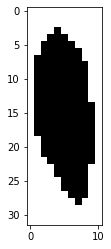

In [32]:
# !this code for analysis purpose 

view2 =  cv2.cvtColor(c_collections[0], cv2.COLOR_BGR2RGB)
view2 = cv2.cvtColor(c_collections[0], cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(view2,0,255,cv2.THRESH_BINARY_INV +  cv2.THRESH_OTSU)
plt.imshow(threshed, cmap ="binary_r")

6668


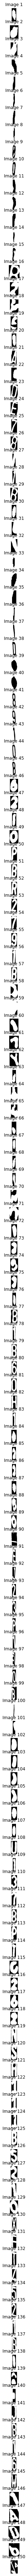

In [35]:

fig, axes = plt.subplots(nrows=150, ncols=1, figsize=(60, 100))
fig.subplots_adjust(left=0.1, bottom=1, right=1, top=2, wspace=0.5, hspace=0.3)

print(len(c_collections))

for i in range(150):
    # Plot the image
    gray_conv = cv2.cvtColor(c_collections[i], cv2.COLOR_BGR2GRAY)
    _, threshed = cv2.threshold(gray_conv,0,255, cv2.THRESH_OTSU)
    axes[i].imshow(cv2.cvtColor(threshed, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')

# Adjust subplot layout
#plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# template matching algorithm

len(c_collections[1])

3